In [17]:
# Linear Regression model

In [1]:

#Import all the required libraries :
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [3]:

dataset = pd.read_csv('Weather.csv',low_memory=False)


In [12]:
#rows and columns
dataset.shape

(119040, 31)

In [13]:
#printing the columns
dataset.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [14]:
#finding the statistical information
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


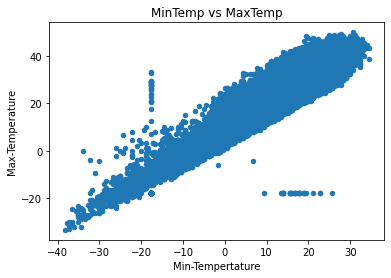

In [20]:
#plotting the data

dataset.plot(x='MinTemp', y='MaxTemp', kind = "scatter")  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('Min-Tempertature')  
plt.ylabel('Max-Temperature')  
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

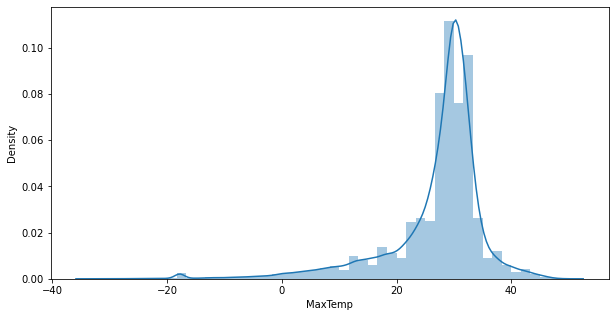

In [27]:
#plotting the maximum temperature alone 
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [46]:
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [51]:
x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [49]:
x.shape

(119040, 1)

In [52]:
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

In [53]:
y.shape

(119040, 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [67]:
print(X_train)
print(X_train.shape)

[[22.22222222]
 [17.77777778]
 [-9.44444444]
 ...
 [ 3.33333333]
 [10.        ]
 [15.55555556]]
(95232, 1)


In [71]:
print(X_test)
print(X_test.shape)

[[25.        ]
 [21.11111111]
 [17.22222222]
 ...
 [23.88888889]
 [21.66666667]
 [22.77777778]]
(23808, 1)


In [72]:
print(y_train)
print(y_train.shape)

[[27.22222222]
 [32.77777778]
 [ 8.88888889]
 ...
 [ 4.44444444]
 [14.44444444]
 [21.11111111]]
(95232, 1)


In [73]:
print(y_test)
print(y_test.shape)

[[28.88888889]
 [31.11111111]
 [27.22222222]
 ...
 [31.11111111]
 [31.11111111]
 [36.66666667]]
(23808, 1)


In [55]:
#defining the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [74]:

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)


[10.66185201]
[[0.92033997]]


In [75]:
y_pred = regressor.predict(X_test)

In [76]:
y_pred

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

In [77]:
df = pd.DataFrame({'Actual': y_test.reshape(-1), 'Predicted': y_pred.reshape(-1)})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


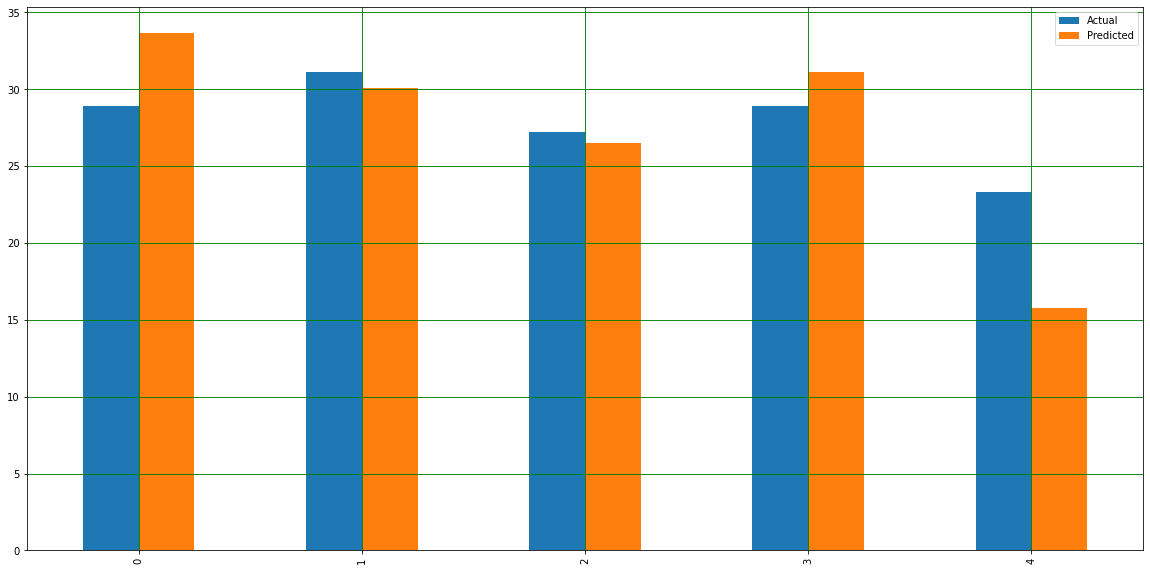

In [83]:

df1 = df.head(5)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='red')
plt.show()


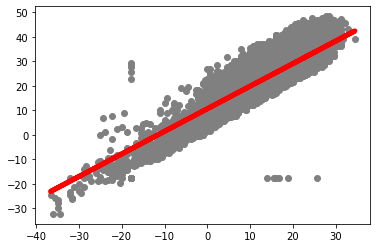

In [88]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=5)
plt.show()

In [85]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


In [9]:
features = dataset[["MaxTemp","MinTemp"]]
features.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


In [11]:
label = dataset["MeanTemp"]
label.head()

0    23.888889
1    25.555556
2    24.444444
3    24.444444
4    24.444444
Name: MeanTemp, dtype: float64

In [13]:
re = LinearRegression()
re.fit(features,label)

LinearRegression()

In [14]:
re.predict([[25,22]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([23.47639566])